In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container
from project_utils.acq_data_capture import Acq_Data_nD
from project_utils.surroagte_gp     import Surrogate_GP



Num_Points = 1


In [2]:
# Load Forrester model

Reg_Data = BB_Model(dataset = 'Regression', Feature_Counts=[2,1])

#Reg_Data.df().head()

['Passive_0', 'Active_1']
[0 1]
[ 0.         21.84447309]


In [3]:
Reg_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9279068212540553


MLPRegressor(random_state=RandomState(MT19937) at 0x25678B39840)

In [4]:
Reg_Data.Random_Forest()

0.9879721283437276


RandomForestRegressor(random_state=RandomState(MT19937) at 0x25678B39840)

In [5]:
Reg_Data.GP()

-447.2361218052105


GaussianProcessRegressor()

In [6]:
print(Reg_Data.get_features())

['Passive_0', 'Active_1']


In [7]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Reg_Data.get_TT_data()

#Initializing the explainer object
URM_Exp = UR_Model(bbox_model           = Reg_Data.get_Random_Forest(),
                   train_data           = X_train,
                   feature_names        = Reg_Data.get_features(),
                   categorical_features = Reg_Data.get_catagorical(),
                   mode                 = Reg_Data.get_mode(),
                   sampling_optimize    = "opt")

#sur_GP = Surrogate_GP()


In [8]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [-0.03310794  0.04480479]
Std 0:  [1.0228693  0.99416787]


In [9]:
# Generate explantion data for Random Forest

Reg_Stats = Feature_Statistics(feature_names = Reg_Data.get_features(), mode = Reg_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
#    data_row  = np.array([0.4])

#    print('data row ',data_row)
    
    URM_Exp.explain(X_init      = data_row.reshape(1, -1),
                    One_D       = False,
                    kernel_type = "Matern",
                    max_iter    = 50,
                    alpha       = "FUR_W",
                    #jitter=5,
                    interval    = 1,
                    normalize   = False)
       
    f_predict = Reg_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = URM_Exp.exp_predict(data_row.reshape(1, -1))
    e_predict = np.array(e_predict).ravel()
    
    acq_data = URM_Exp.get_acq_data()
    
#    X, y = URM_Exp.get_surrogate_data()

#    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(URM_Exp.get_surrogate_data())

    print(f_predict, e_predict)
    
    scores = URM_Exp.permutation_importance()
    
    Reg_Stats.Add_Sample(sample_scores = scores,
                         outcome       = y_test[test_instance],
                         X_row         = data_row.reshape(1, -1),
                         f_prediction  = f_predict,
                         e_prediction  = e_predict.ravel(),
                         feopt         = acq_data.get_fe_x0(),
                         model         = URM_Exp.get_exp_model())


INSTANCE:  0
NEXT X:  [[ 0.51544997 -0.80823261]]


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


NEXT X:  [[ 0.78702218 -0.54428065]]
NEXT X:  [[ 1.12729367 -0.34311314]]
NEXT X:  [[2.04611375 0.67948117]]
NEXT X:  [[2.20283949 0.33123535]]
NEXT X:  [[2.32110094 0.94207563]]
NEXT X:  [[ 1.32244584 -0.02388081]]
NEXT X:  [[1.79533059 0.98896571]]
NEXT X:  [[1.86909198 0.54834179]]
NEXT X:  [[2.56118857 1.18010313]]
NEXT X:  [[1.78689912 0.42753987]]
NEXT X:  [[ 0.8949465  -0.00753521]]
NEXT X:  [[1.92692193 0.40084371]]
NEXT X:  [[1.39350691 0.04518631]]
NEXT X:  [[1.92887709 0.52379791]]
NEXT X:  [[ 1.92465258 -0.02251051]]
NEXT X:  [[1.49153757 0.14046624]]
NEXT X:  [[1.68812718 0.3315396 ]]
NEXT X:  [[1.81178345 0.25903048]]
NEXT X:  [[1.62835118 0.2734409 ]]
NEXT X:  [[ 1.21232056 -0.11780093]]
NEXT X:  [[1.4408768 0.091227 ]]
NEXT X:  [[1.24995871 0.40809821]]
NEXT X:  [[1.86937085 0.5066147 ]]
NEXT X:  [[1.51282779 0.57234949]]
NEXT X:  [[2.03365582 0.86493685]]
NEXT X:  [[1.56980073 0.21653337]]
NEXT X:  [[1.50182278 0.35463248]]
NEXT X:  [[1.65365964 0.2980392 ]]
NEXT X:  [

In [10]:
import matplotlib.pyplot as plt


In [11]:
print(f_predict)
print(e_predict)


[3.24420625]
[3.24420626e+00 1.00000004e-05]


In [12]:
Reg_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           0.3033577478959546  :  0.0  :  0.3033577478959546
y - exp(x):          0.3033577411887265  :  0.0  :  0.3033577411887265
BB(x) - exp(x):      6.7072281062507955e-09  :  0.0  :  6.7072281062507955e-09
Average exp(x) var:  1.0000000413701846e-05


In [13]:
#Reg_Stats.Jaccard_Values()

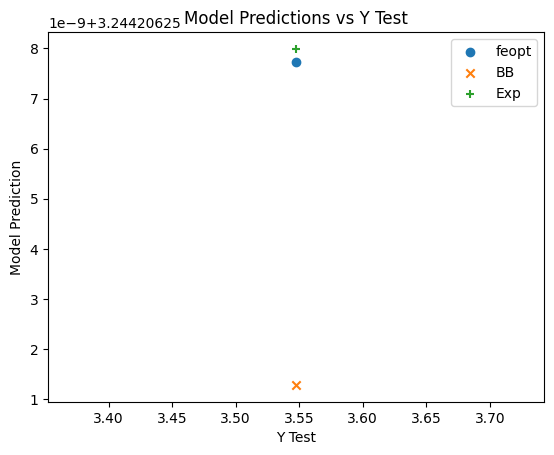

In [14]:
Reg_Stats.Reg_Fidelity_Graph()

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF

#X, y = URM_Exp.get_surrogate_data()
#kernel = Matern()

#GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer = 10, optimizer='fmin_l_bfgs_b', normalize_y = False, copy_X_train=True)
#GP.fit(X, y)
        
#print(y[0])
#fe = GP.predict(X[0].reshape(1,-1))
#print(fe)
#ey = URM_Exp.gpmodel_predict(X[0].reshape(1,-1))
#print(ey)


In [16]:
acq_data.Create_BB_plot()

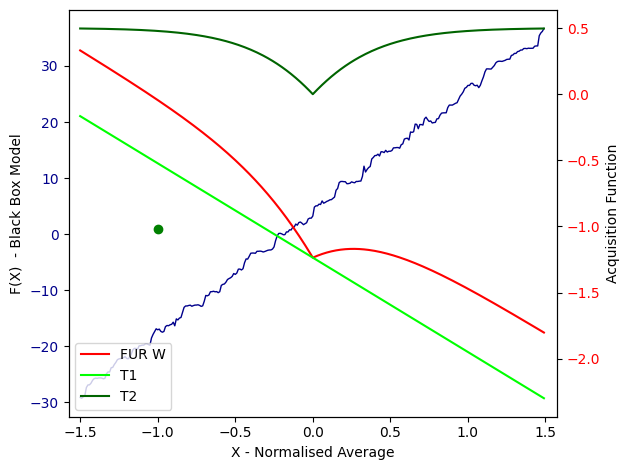

In [17]:
acq_data.plot_point(0)

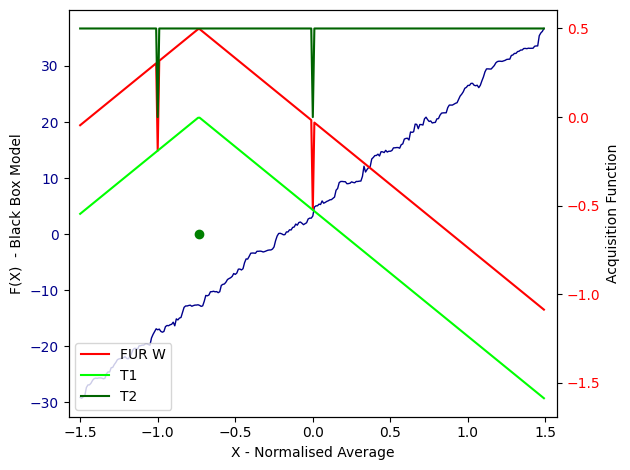

In [18]:
acq_data.plot_point(1)

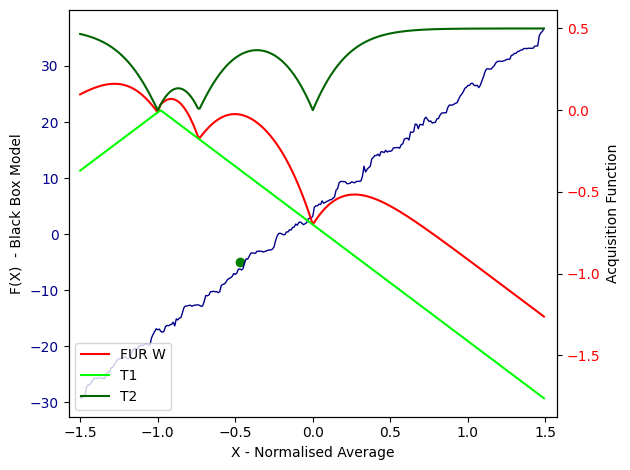

In [19]:
acq_data.plot_point(2)

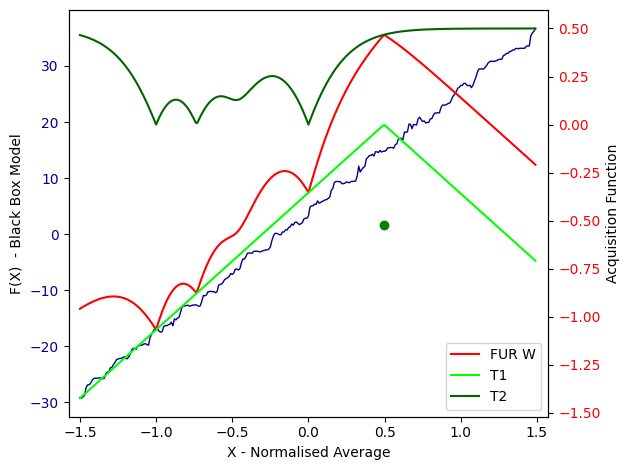

In [20]:
acq_data.plot_point(3)

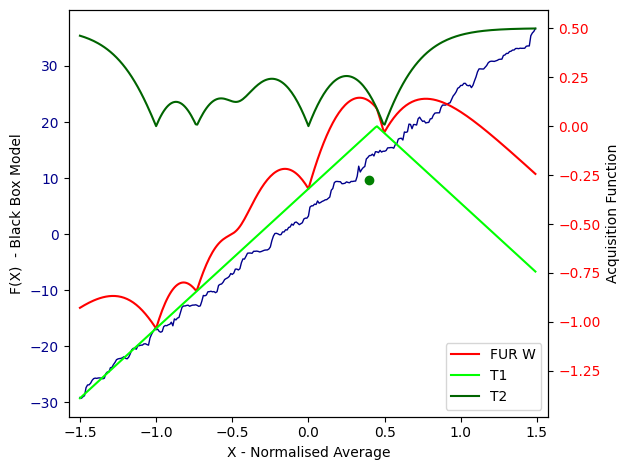

In [21]:
acq_data.plot_point(4)

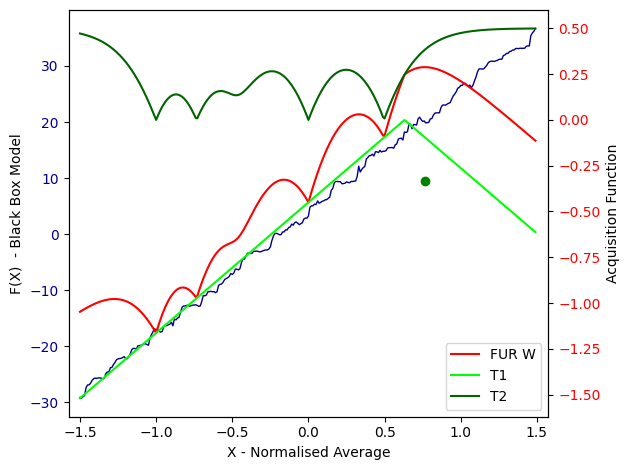

In [22]:
acq_data.plot_point(5)

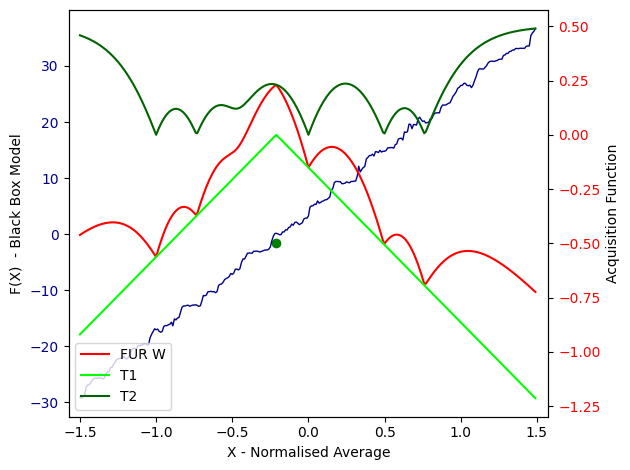

In [23]:
acq_data.plot_point(6)

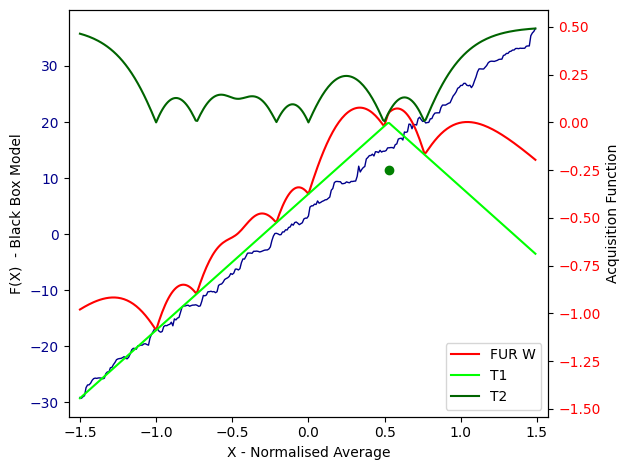

In [24]:
acq_data.plot_point(7)

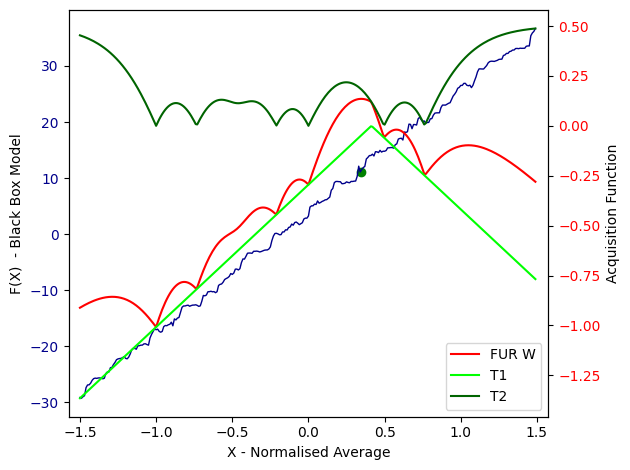

In [25]:
acq_data.plot_point(8)

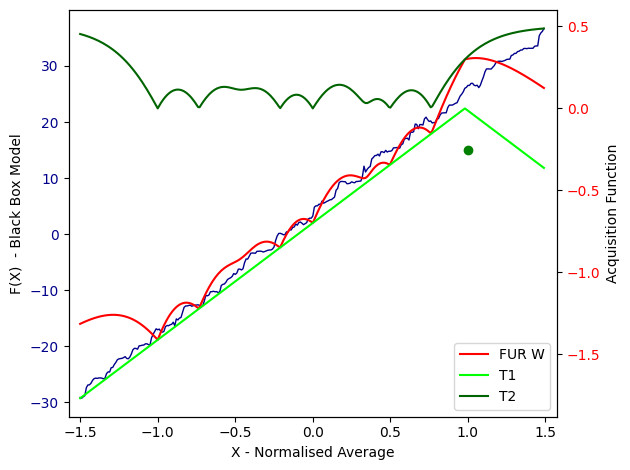

In [26]:
acq_data.plot_point(9)

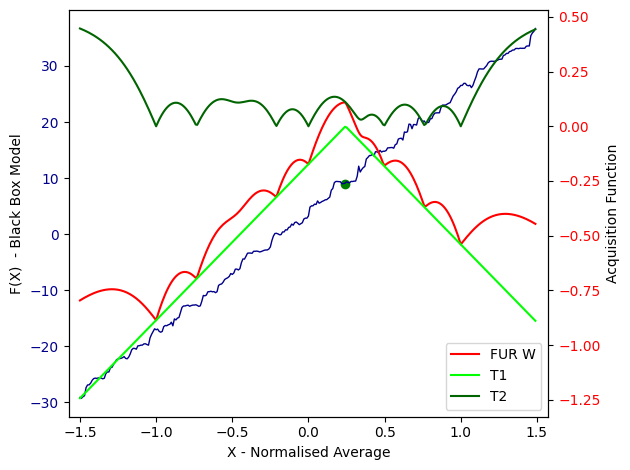

In [27]:
acq_data.plot_point(10)

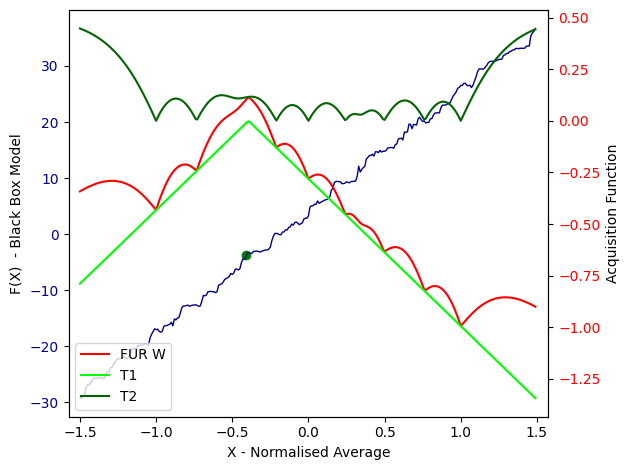

In [28]:
acq_data.plot_point(11)

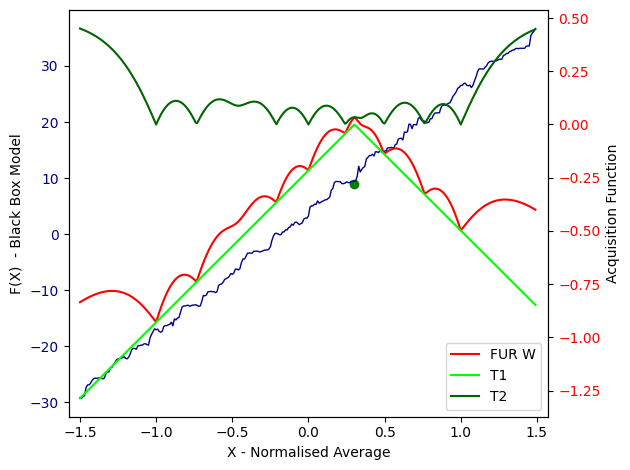

In [29]:
acq_data.plot_point(12)

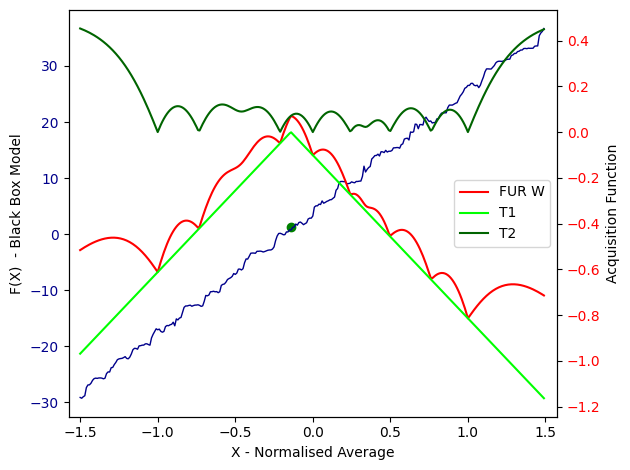

In [30]:
acq_data.plot_point(13)

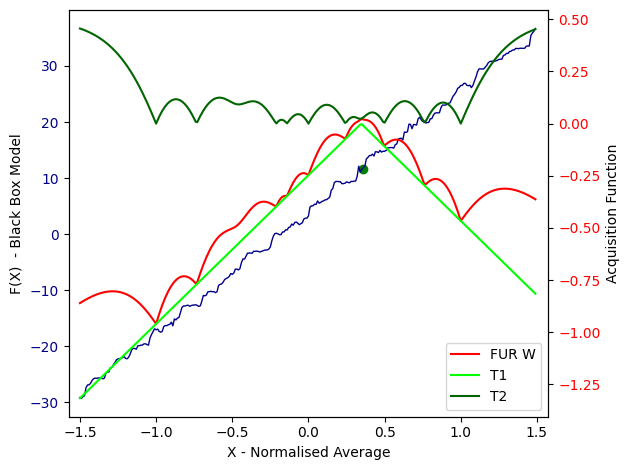

In [31]:
acq_data.plot_point(14)

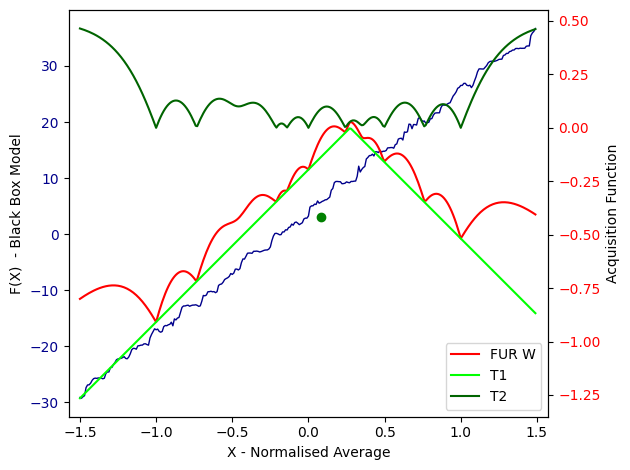

In [32]:
acq_data.plot_point(15)

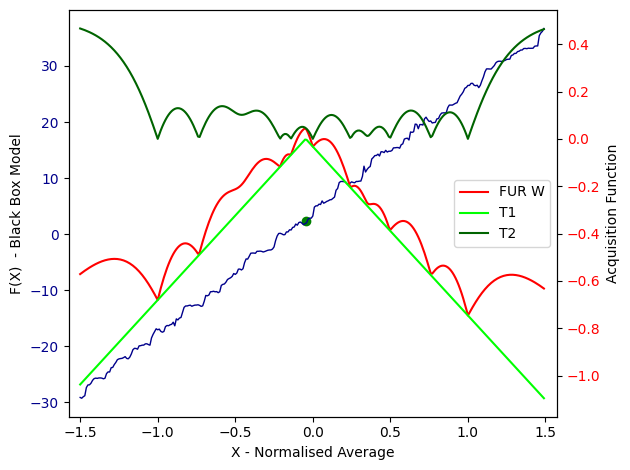

In [33]:
acq_data.plot_point(16)

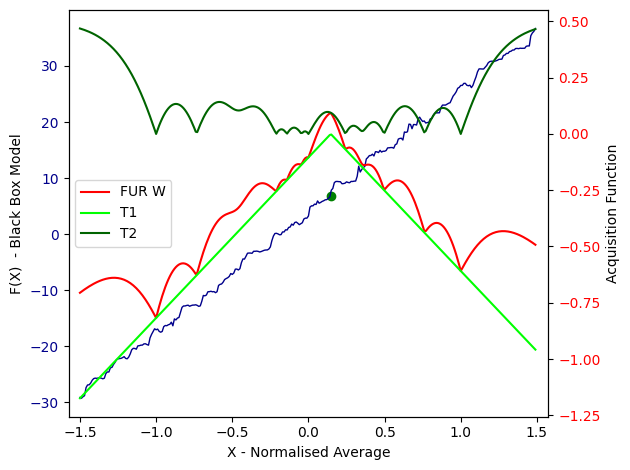

In [34]:
acq_data.plot_point(17)

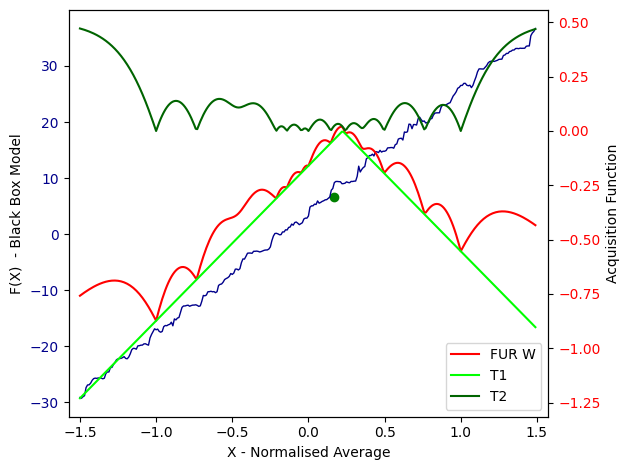

In [35]:
acq_data.plot_point(18)

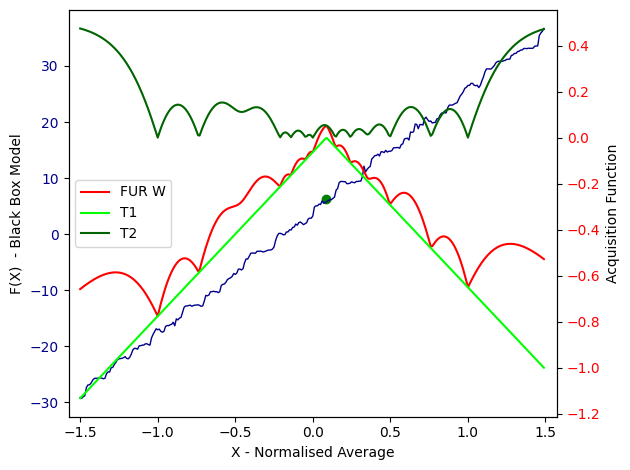

In [36]:
acq_data.plot_point(19)

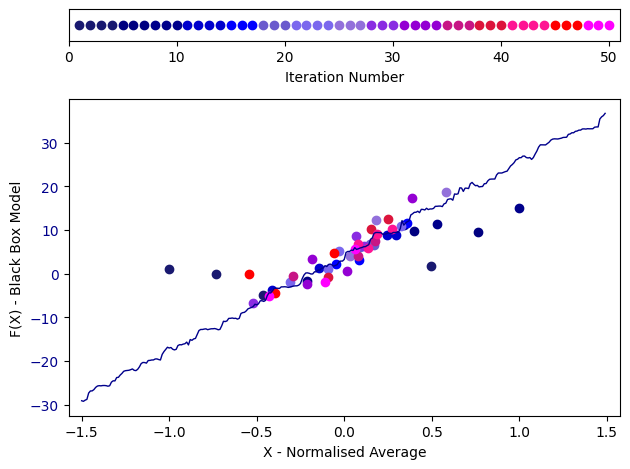

In [37]:
acq_data.plot_all()